# Azure DP-100 Practice Notebook

This notebook contains practice exercises for the Azure DP-100 certification.

## Setup

In [2]:
# Import required libraries
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Connect to Azure ML workspace
credential = DefaultAzureCredential()
ml_client = MLClient(
    credential=credential,
    subscription_id="YOUR_SUBSCRIPTION_ID",
    resource_group_name="AI-102",
    workspace_name="Machinelearning"
)

print("Connected to Azure ML workspace!")
print(f"Workspace: {ml_client.workspaces.get('Machinelearning').display_name}")

Class DeploymentTemplateOperations: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


Connected to Azure ML workspace!
Workspace: Machinelearning


## Exercise 1: Data Exploration

Load and explore a sample dataset

In [4]:
# Load sample data (you can replace this with real data)
np.random.seed(42)
data = {
    'feature1': np.random.normal(0, 1, 1000),
    'feature2': np.random.normal(5, 2, 1000),
    'target': np.random.randint(0, 2, 1000)
}

df = pd.DataFrame(data)
print("Sample dataset created!")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Target distribution: \n{df['target'].value_counts()}")

Sample dataset created!
   feature1  feature2  target
0  0.496714  7.798711       1
1 -0.138264  6.849267       0
2  0.647689  5.119261       1
3  1.523030  3.706126       0
4 -0.234153  6.396447       0

Dataset shape: (1000, 3)
Target distribution: 
target
0    510
1    490
Name: count, dtype: int64


## Exercise 2: Model Training

Train a simple logistic regression model

In [5]:
# Prepare data for training
X = df[['feature1', 'feature2']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (800, 2)
Test set shape: (200, 2)


In [6]:
# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display coefficients
print(f"Coefficients: {model.coef_[0]}")
print(f"Intercept: {model.intercept_[0]}")

Model Accuracy: 0.4450
Coefficients: [-0.05290139 -0.0645013 ]
Intercept: 0.2896862127041062


## Exercise 3: Data Visualization

Create visualizations to understand the data

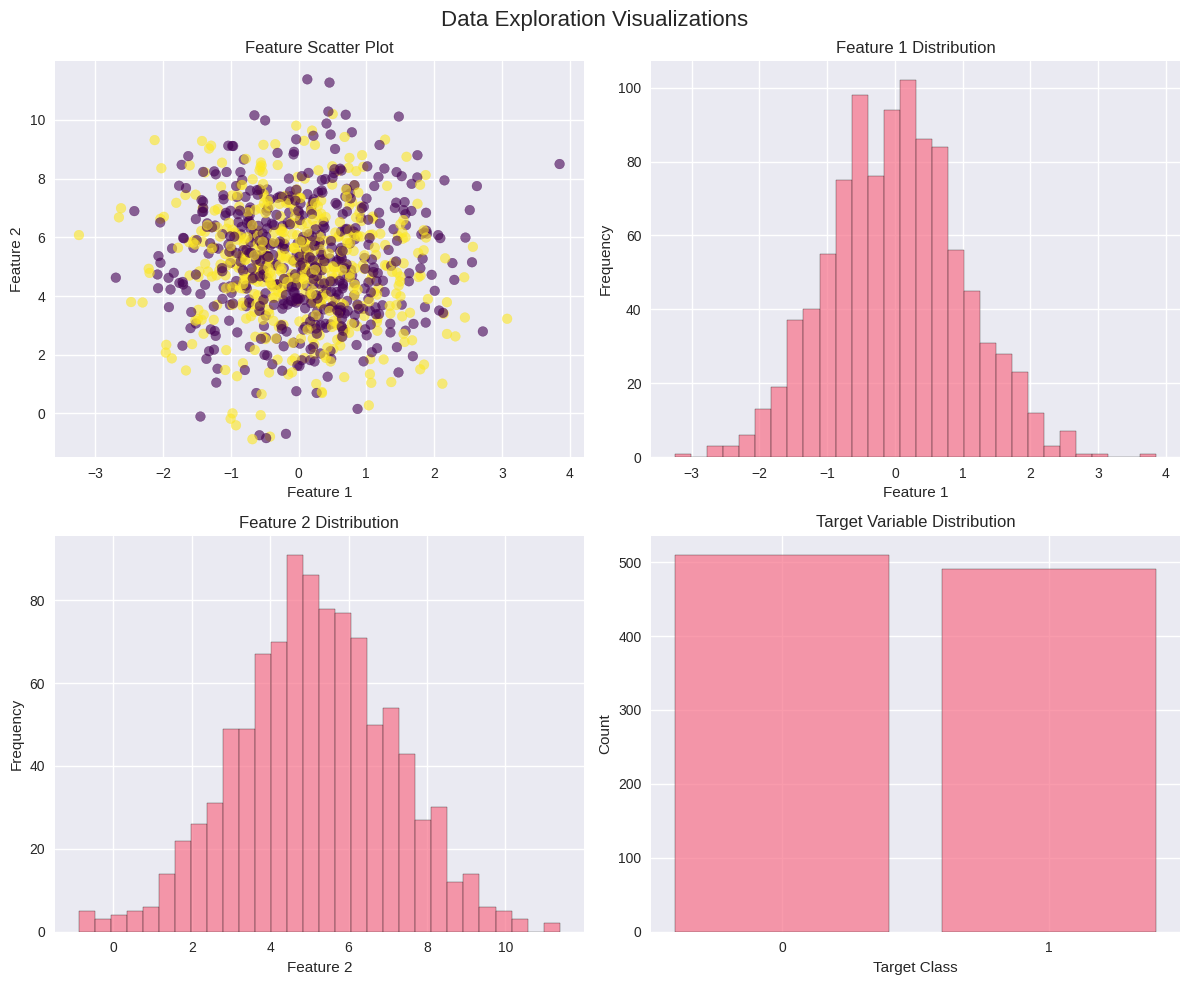

In [7]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Data Exploration Visualizations', fontsize=16)

# Scatter plot
axes[0,0].scatter(df['feature1'], df['feature2'], c=df['target'], cmap='viridis', alpha=0.6)
axes[0,0].set_title('Feature Scatter Plot')
axes[0,0].set_xlabel('Feature 1')
axes[0,0].set_ylabel('Feature 2')

# Histograms
axes[0,1].hist(df['feature1'], bins=30, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Feature 1 Distribution')
axes[0,1].set_xlabel('Feature 1')
axes[0,1].set_ylabel('Frequency')

axes[1,0].hist(df['feature2'], bins=30, alpha=0.7, edgecolor='black')
axes[1,0].set_title('Feature 2 Distribution')
axes[1,0].set_xlabel('Feature 2')
axes[1,0].set_ylabel('Frequency')

# Target distribution
target_counts = df['target'].value_counts()
axes[1,1].bar(target_counts.index, target_counts.values, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Target Variable Distribution')
axes[1,1].set_xlabel('Target Class')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticks([0, 1])

plt.tight_layout()
plt.show()

## Exercise 4: Azure ML Integration

Register the model in Azure ML workspace

In [9]:
# Register the model (example - you would typically save the model first)
from azure.ai.ml.entities import Model
from azure.ai.ml.constants import AssetTypes
import joblib

# Save model locally
joblib.dump(model, 'logistic_regression_model.pkl')

# Register model in Azure ML
model_asset = Model(
    name="dp100_logistic_regression",
    version="1",
    description="Logistic regression model trained for DP-100 practice",
    path="logistic_regression_model.pkl",
    type=AssetTypes.CUSTOM_MODEL,
    properties={
        "accuracy": str(accuracy),
        "algorithm": "LogisticRegression"
    }
)

registered_model = ml_client.models.create_or_update(model_asset)
print(f"Model registered successfully!")
print(f"Model name: {registered_model.name}")
print(f"Model version: {registered_model.version}")
print(f"Model ID: {registered_model.id}")

Model registered successfully!
Model name: dp100_logistic_regression
Model version: 1
Model ID: /subscriptions/YOUR_SUBSCRIPTION_ID/resourceGroups/AI-102/providers/Microsoft.MachineLearningServices/workspaces/Machinelearning/models/dp100_logistic_regression/versions/1


## Next Steps

1. **Experiment with different algorithms**: Try Random Forest, SVM, or Neural Networks
2. **Hyperparameter tuning**: Use Azure ML's automated ML or hyperparameter tuning
3. **Pipeline creation**: Build end-to-end ML pipelines in Azure ML
4. **Model deployment**: Deploy your trained models as web services
5. **Real datasets**: Use Azure Open Datasets or upload your own datasets

Happy learning! 🚀